In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

datos = pd.read_csv('iris.csv')
datos.head()

%matplotlib inline

In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
datos.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
datos.variety.value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

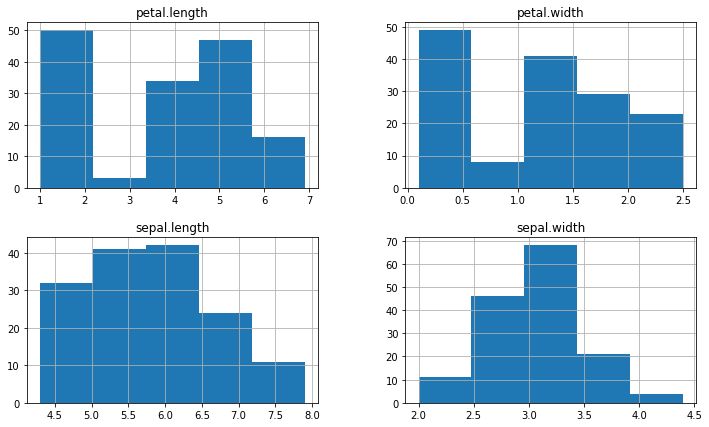

In [19]:
datos.hist(bins = 5, figsize = (12, 7));

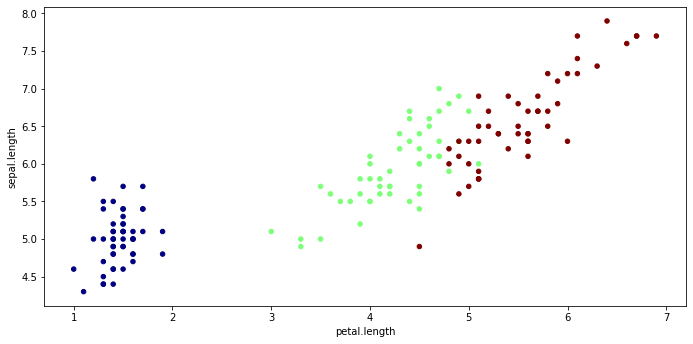

In [20]:
datos.variety = pd.Categorical(datos.variety)
datos['code'] = datos.variety.cat.codes

datos.plot(kind = "scatter", x = "petal.length", y = "sepal.length",
          figsize= (11.5, 5.5),  c = 'code', cmap = plt.get_cmap("jet"), colorbar = False)

In [21]:
datos.variety

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: category
Categories (3, object): [Setosa, Versicolor, Virginica]

In [22]:
datos.code

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: code, Length: 150, dtype: int8

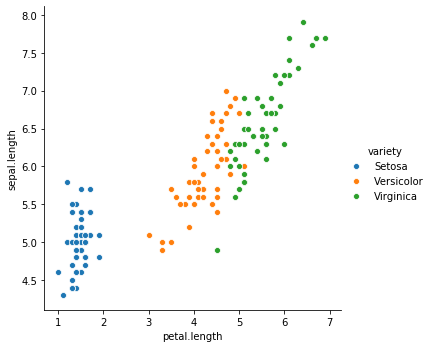

In [23]:
import seaborn as sns
sns.pairplot(x_vars = ["petal.length"], y_vars = ["sepal.length"], data = datos, hue = "variety", height = 5);

In [24]:
# Se eliminó Setosa de manera que el ejercico pudiera ser práctico a la hora de
# mostrar las métricas de desempeño y que sean representativas
datos1 = datos.copy()
datos1 = datos1[datos1.code > 0]
datos1['code'] = datos1['code'] -1
del datos1['variety']
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null category
code            150 non-null int8
dtypes: category(1), float64(4), int8(1)
memory usage: 5.2 KB


In [25]:
datos1.code.value_counts()

1    50
0    50
Name: code, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(datos1, test_size=0.3, random_state = 42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 61 to 101
Data columns (total 5 columns):
sepal.length    70 non-null float64
sepal.width     70 non-null float64
petal.length    70 non-null float64
petal.width     70 non-null float64
code            70 non-null int8
dtypes: float64(4), int8(1)
memory usage: 2.8 KB


In [60]:
from sklearn.neighbors import KNeighborsClassifier

Xknn_train = np.c_[train_set.iloc[:, 0:4]]
yknn_train = np.r_[train_set['code']]
Xknn_test = np.c_[test_set.iloc[:, 0:4]]
yknn_test = np.r_[test_set['code']]

In [61]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(Xknn_train, yknn_train)

y_predict_train = neigh.predict(Xknn_train)
y_proba_train = neigh.predict_proba(Xknn_train)

y_predict_test = neigh.predict(Xknn_test)
print(yknn_train)
print(y_predict_test)
y_proba_train = neigh.predict_proba(Xknn_test)

[0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]
[0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1]


In [62]:
y_proba_train.tolist()

[[0.6666666666666666, 0.3333333333333333],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.3333333333333333, 0.6666666666666666],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.6666666666666666, 0.3333333333333333],
 [0.6666666666666666, 0.3333333333333333],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.6666666666666666, 0.3333333333333333],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0]]

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(yknn_train, y_predict_train)
acc_test = accuracy_score(yknn_test, y_predict_test)

precision_train = precision_score(yknn_train, y_predict_train)
precision_test = precision_score(yknn_test, y_predict_test)

recall_train = recall_score(yknn_train,y_predict_train)
recall_test = recall_score(yknn_test,y_predict_test)

In [64]:
print("Test Accuracy: %2f" % acc_test)
print("Train Accuracy: %2f" % acc_train)
print("Test Precision: %2f" % precision_test)
print("Train Precision: %2f" % precision_train)
print("Test recall: %2f" % recall_test)
print("Train recall: %2f" % recall_train)

Test Accuracy: 0.833333
Train Accuracy: 0.985714
Test Precision: 0.900000
Train Precision: 1.000000
Test recall: 0.692308
Train recall: 0.972973
